# Identifying Heart Disease

* Author: Megan Chastain
* Date: November 11th, 2025
  

## Introduction
 Heart disease effects millions of people around the world. Structural heart disease remains underdiagnosed and early detection is critical for reducing the probablity of it becoming fatal. Applied machine learning is a modern way to detect heart disease early based on training a program to read echocardiograms. The following is example of how to train a program to detect heart disease using a small sample size.

##### Poterucha, T.J., Jing, L., Ricart, R.P. et al. Detecting structural heart disease from electrocardiograms using AI. Nature 644, 221–230 (2025). https://doi.org/10.1038/s41586-025-09227-0

In [227]:
# Imports

import pandas as pd
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
reg = LinearRegression()
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Section 1. Import and Inspect the Data

### 1.1 Load the dataset and display the first 10 rows

In [228]:
# Load Heart Disease dataset
# I'm only using the already processed data from Cleveland
file_path="processed.cleveland.data"
columns = [
    "age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","disease"
]
heart = pd.read_csv(file_path,names=columns) 

heart.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


### 1.2 Check for missing values and display summary statistics

In [229]:
# Display the data types
print(heart.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  disease   303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB
None


In [230]:
# Display summary statistics
print(heart.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope     disease  
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.937294  
std      0.994971   22.875003 

In [231]:
# Identify the missing values (equal to '?')
print((heart == '?').sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
disease     0
dtype: int64


### Reflection 1: What do you notice about the dataset? Are there any data issues?
### There are some missing values, but not many, only 6. The data is already in a binary setting for categorical information, like the feature num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
### This reduces the amount of preparation I have to do with the data.

## Section 2. Data Exploration and Preparation

### 2.1 Explore data patterns and distributions

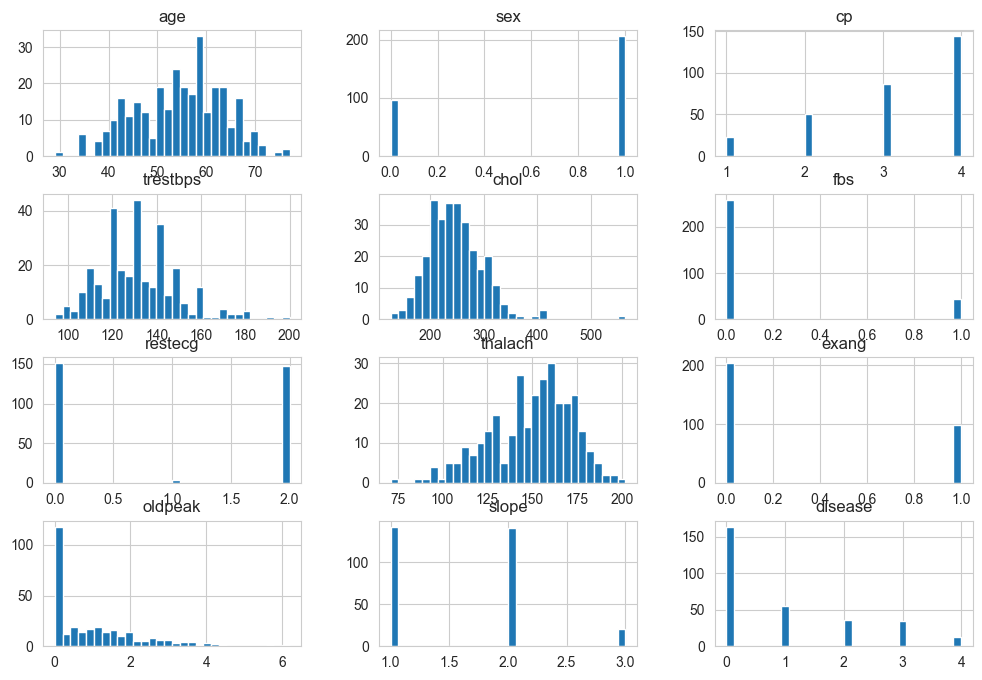

In [232]:
#Histograms of the data features
heart.hist(bins=30, figsize=[12,8])
plt.show()

In [233]:
print(heart.corr(numeric_only=True))

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.097542  0.104139  0.284946  0.208950  0.118530   
sex      -0.097542  1.000000  0.010084 -0.064456 -0.199915  0.047862   
cp        0.104139  0.010084  1.000000 -0.036077  0.072319 -0.039975   
trestbps  0.284946 -0.064456 -0.036077  1.000000  0.130120  0.175340   
chol      0.208950 -0.199915  0.072319  0.130120  1.000000  0.009841   
fbs       0.118530  0.047862 -0.039975  0.175340  0.009841  1.000000   
restecg   0.148868  0.021647  0.067505  0.146560  0.171043  0.069564   
thalach  -0.393806 -0.048663 -0.334422 -0.045351 -0.003432 -0.007854   
exang     0.091661  0.146201  0.384060  0.064762  0.061310  0.025665   
oldpeak   0.203805  0.102173  0.202277  0.189171  0.046564  0.005747   
slope     0.161770  0.037533  0.152050  0.117382 -0.004062  0.059894   
disease   0.222853  0.224469  0.407075  0.157754  0.070909  0.059186   

           restecg   thalach     exang   oldpeak     slope   di

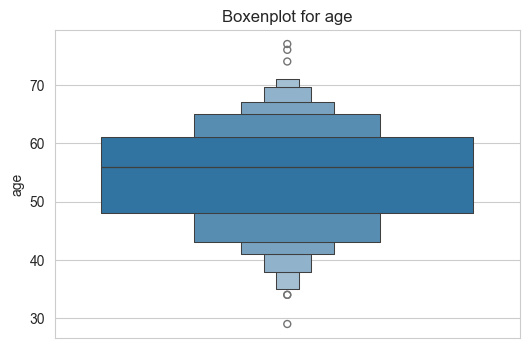

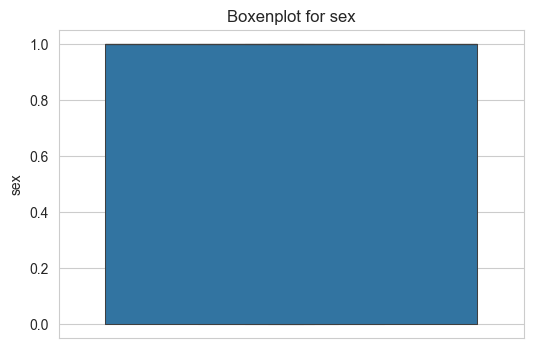

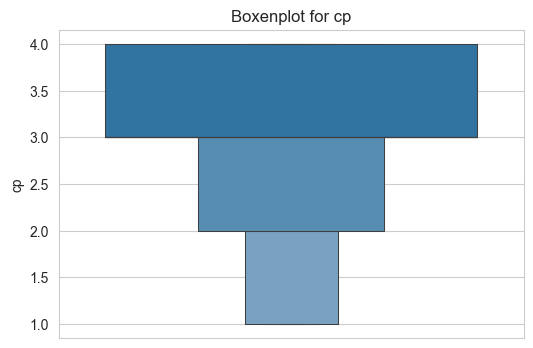

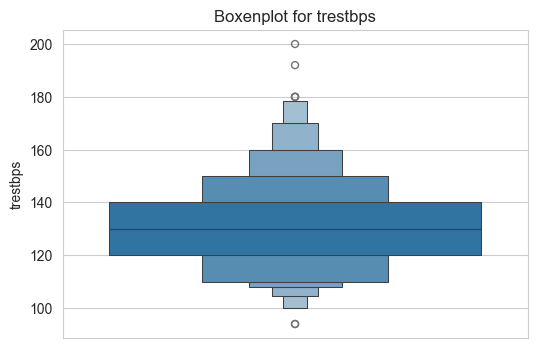

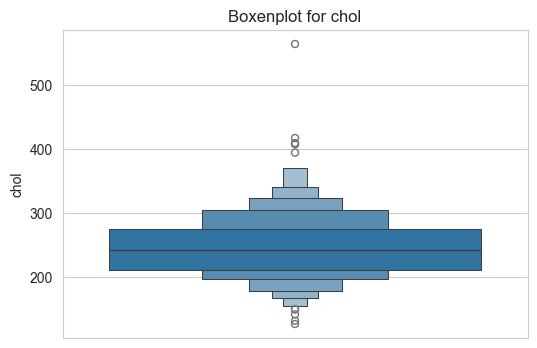

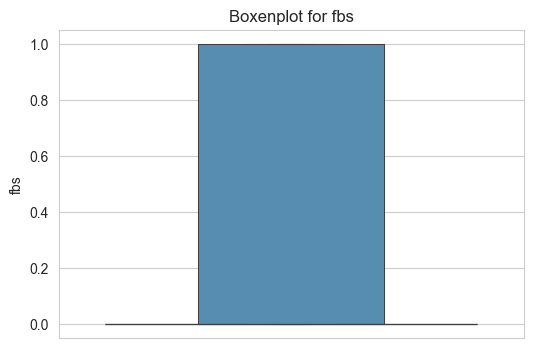

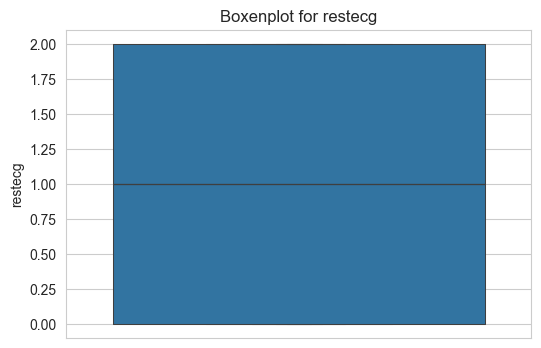

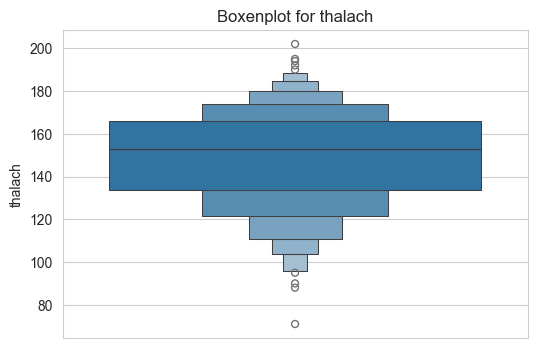

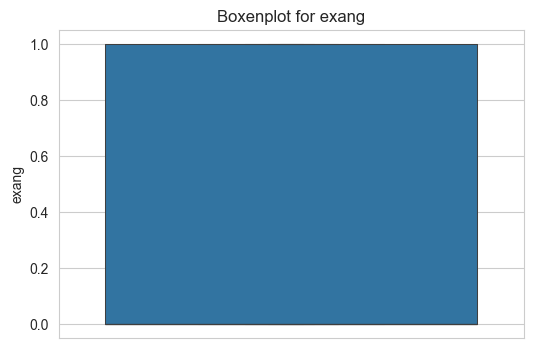

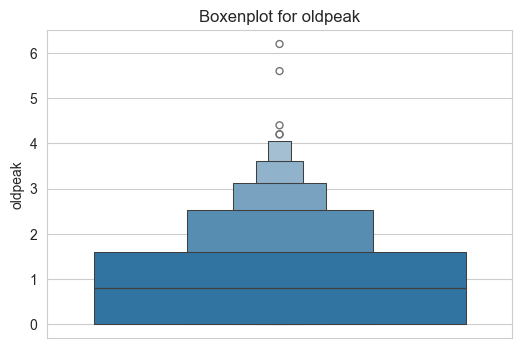

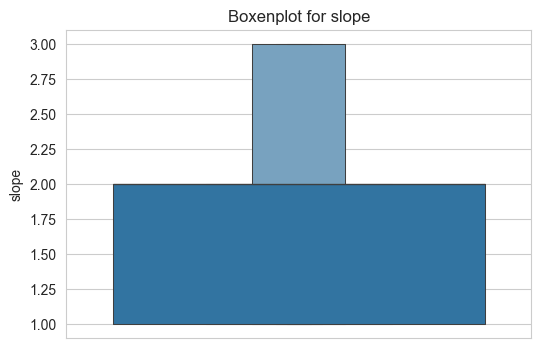

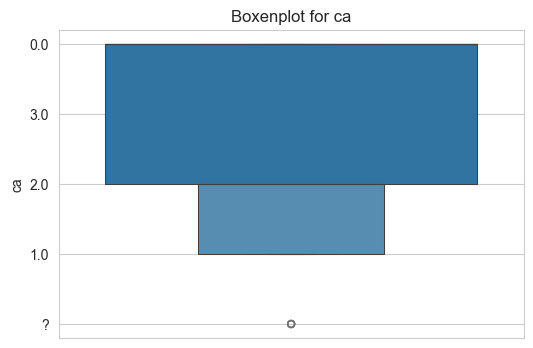

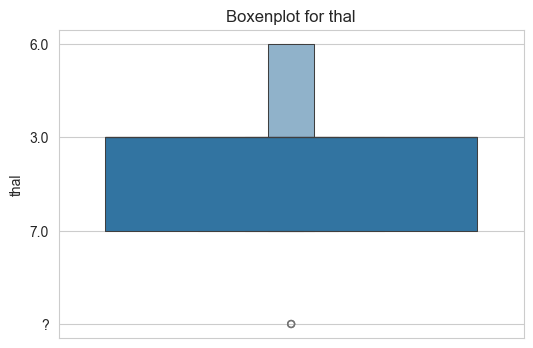

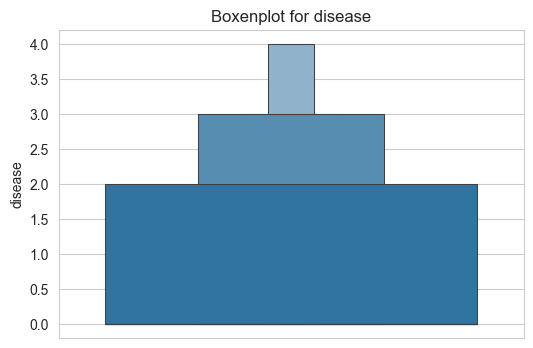

In [234]:
#Boxenplots of the features.
for column in heart.columns:
    plt.figure(figsize=(6, 4))
    sns.boxenplot(y=heart[column])
    plt.title(f'Boxenplot for {column}')
    plt.show()

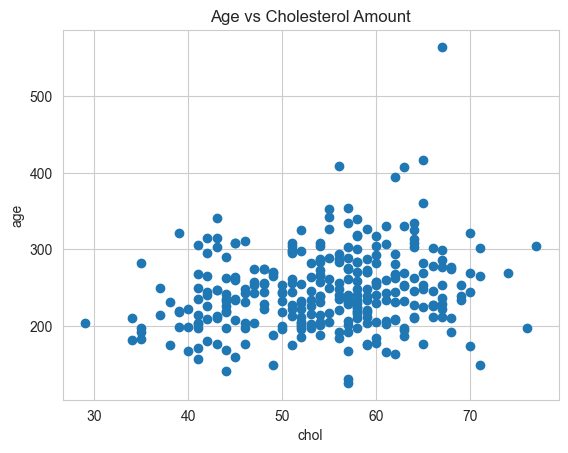

In [235]:
plt.scatter(
    heart["age"], heart["chol"]
)
plt.xlabel("chol")
plt.ylabel("age")
plt.title("Age vs Cholesterol Amount")
plt.show()

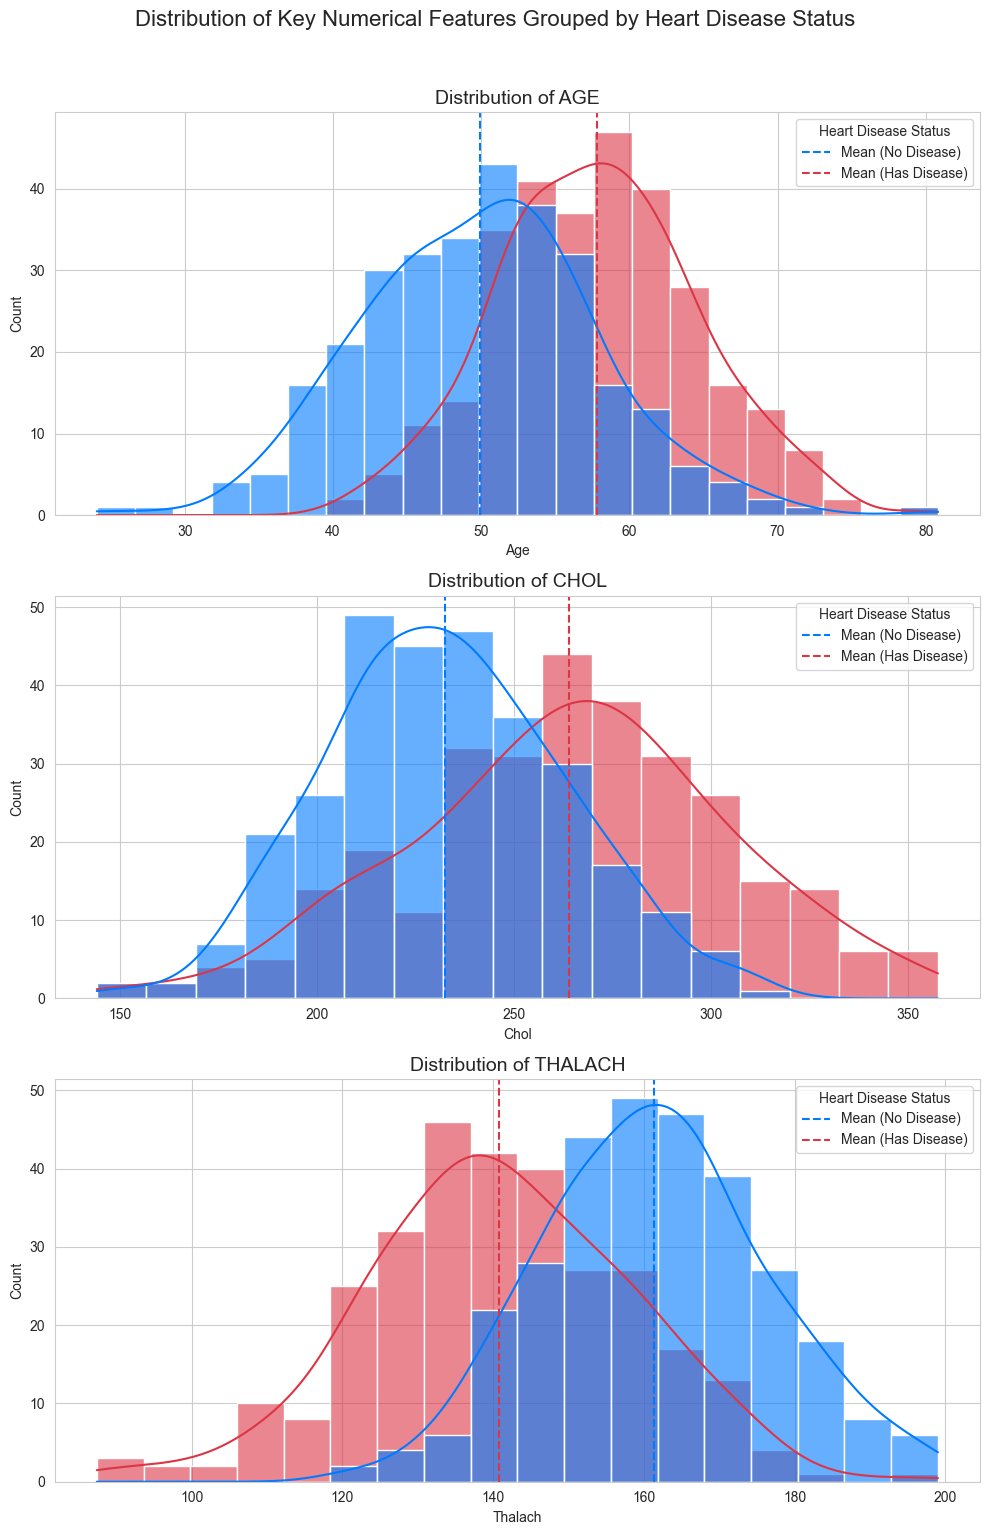

In [236]:
# Histogram of numerical data
sns.set_style("whitegrid")
fig, axes = plt.subplots(len(numerical_features), 1, figsize=(10, 15))
plt.suptitle('Distribution of Key Numerical Features Grouped by Heart Disease Status', fontsize=16, y=1.02)

for i, feature in enumerate(numerical_features):
    ax = axes[i]
    
    # Use seaborn's histplot with 'hue' set to the target variable
    sns.histplot(
        data=df, 
        x=feature, 
        hue='target', 
        kde=True, # Add a Kernel Density Estimate line for smoothing
        palette=['#007bff', '#dc3545'], # Blue for healthy, Red for disease
        alpha=0.6,
        ax=ax
    )
    
    # Add mean lines for each group for visual reference
    mean_disease = df[df['target'] == 'Has Disease'][feature].mean()
    mean_no_disease = df[df['target'] == 'No Disease'][feature].mean()
    
    ax.axvline(mean_no_disease, color='#007bff', linestyle='--', linewidth=1.5, label='Mean (No Disease)')
    ax.axvline(mean_disease, color='#dc3545', linestyle='--', linewidth=1.5, label='Mean (Has Disease)')

    ax.set_title(f'Distribution of {feature.upper()}', fontsize=14)
    ax.set_xlabel(feature.capitalize())
    ax.legend(title='Heart Disease Status')

plt.tight_layout()
plt.show()

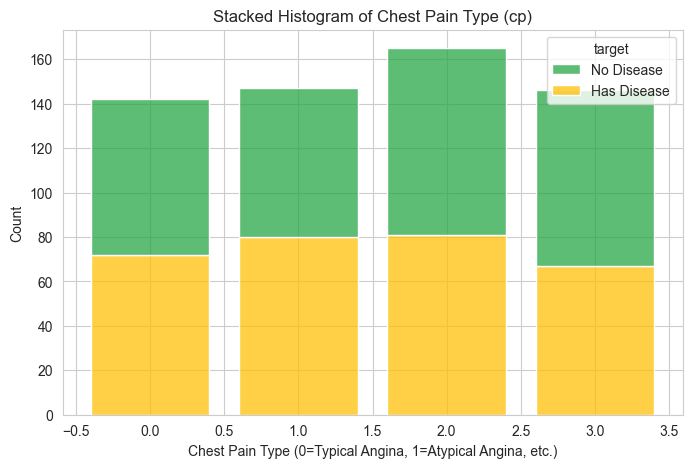

In [237]:
# Discrete/Ordinal histogram
# Mock data for Chest Pain Type (cp)
df['cp'] = np.random.choice([0, 1, 2, 3], size=len(df))

plt.figure(figsize=(8, 5))
sns.histplot(
    data=df, 
    x='cp', 
    hue='target', 
    multiple='stack', # Stack the bars for total count
    discrete=True, 
    palette=['#28a745', '#ffc107'], # Different color scheme
    shrink=.8 # Space between groups
)
plt.title('Stacked Histogram of Chest Pain Type (cp)')
plt.xlabel('Chest Pain Type (0=Typical Angina, 1=Atypical Angina, etc.)')
plt.show()

### 2.2 Handle missing values and clean data
### The data is already processed and the features I will be selecting do not have missing values. I will be adding a new column.

In [238]:
heart_c = heart.dropna().copy()

### 2.3 Feature selection and engineering
### 

In [239]:
#I am going to simplify the num column to represent an instance of 0: < 50% diameter narrowing and an instaince of 1: > 50% diameter narrowing
heart_c['h.target'] = np.where(heart['disease'] > 0, 1, heart['disease'])
heart_c.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease,h.target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


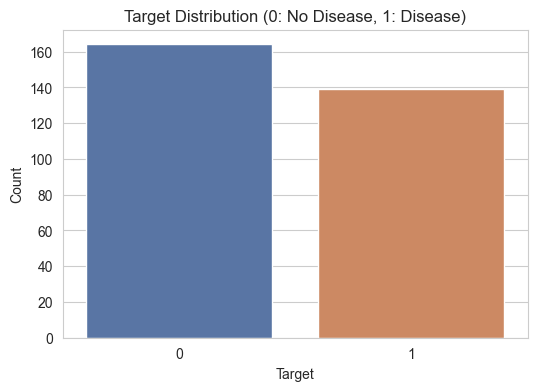

In [240]:
plt.figure(figsize=(6,4))
sns.countplot(data=heart_c, x='h.target', hue='h.target',
              palette=['#4C72B0', '#DD8452'], legend=False)
plt.title('Target Distribution (0: No Disease, 1: Disease)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

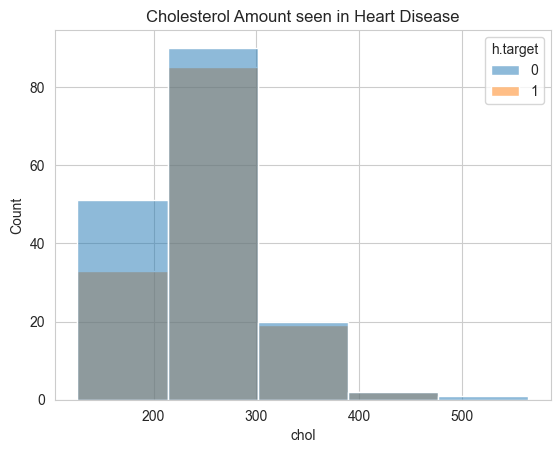

In [241]:
#Visualize the new column
sns.histplot(x="chol",hue="h.target",data=heart_c,bins=5)
plt.title("Cholesterol Amount seen in Heart Disease")
plt.show()

### Reflection 2: 
1. What patterns or anomalies do you see? Do any features stand out? One feature that stood out was the "thalach" column, or max heart rate acheived. It has a high negative correlation with heart disease.
2. What preprocessing steps were necessary to clean and improve the data? The data was already processed and cleaned. 
3. Did you create or modify any features to improve performance? I simplified the target column to combine all values greater than 0 into 1 positive value to visualize it better.

## Section 3. Feature Selection and Justification

### 3.1 Choose features and target

* Target: h.target column, or instance of 0: < 50% diameter narrowing and an instaince of 1: > 50% diameter narrowing
* Features: all attributes

### 3.2 Define X and y

Test 1)
* X= Age
* y=num_simplified
  
Test 2)
* X=Chol
* y=num_simplified

In [242]:
X = heart_c[["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope"]]
y = heart_c["h.target"]


## Section 4. Train a Model (Classification: Choose 1: Decision Tree, Random Forest, Logistic Regression)

### 4.1 Split the data into training and test sets using train_test_split (or StratifiedShuffleSplit if class imbalance is an issue).

In [243]:
# Stratified Train/Test split
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
   X_train = X.iloc[train_idx]
   X_test = X.iloc[test_idx]
   y_train = y.iloc[train_idx]
   y_test = y.iloc[test_idx]

print("Train size:", len(train_set))
print("Test size:", len(test_set))

Train size: 242
Test size: 61


### 4.2 Train model using Scikit-Learn model.fit() method.


In [244]:
model = LogisticRegression(random_state=123, max_iter=1000)
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,123
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### 4.3 Evalulate performance

In [245]:
y1_pred = model.predict(X_test)

In [246]:
#R2
r2=r2_score(y_test,y1_pred)
print(f'R2:{r2:.2f}')

R2:0.47


In [247]:
#MAE
mae=mean_absolute_error(y_test,y1_pred)
print(f'MAE:{mae:.2f}')


MAE:0.13


In [248]:
#RMSE
rmse = root_mean_squared_error(y_test, y1_pred)
print(f'RMSE:{rmse:.2f}')

RMSE:0.36


In [257]:
y_pred= model.predict(X_train)
print(classification_report(y_train, y_pred))

# Predict on test data
y1_test_pred = model.predict(X_test)
print("Results for Log Regression:")
print(classification_report(y_test, y1_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       131
           1       0.79      0.75      0.77       111

    accuracy                           0.79       242
   macro avg       0.79      0.79      0.79       242
weighted avg       0.79      0.79      0.79       242

Results for Log Regression:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88        33
           1       0.88      0.82      0.85        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



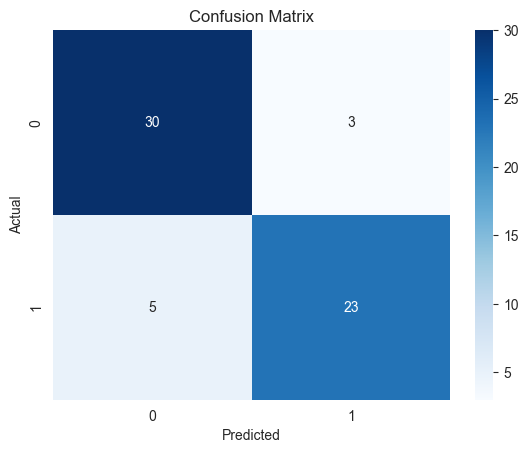

In [251]:
# Create confusion matrix for test predictions
cm1 = confusion_matrix(y_test, y1_test_pred)

# Plot heatmap
sns.heatmap(cm1, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Reflection 4: 
1. How well did the model perform? Any surprises in the results? My log regression model had a percision score of 88% and an accuracy score of 87%, which I think is pretty good considering I am a beginner.

## Section 5. Improve the Model or Try Alternates (Implement a Second Option)

### 5.1 Train an alternative classifier

In [252]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


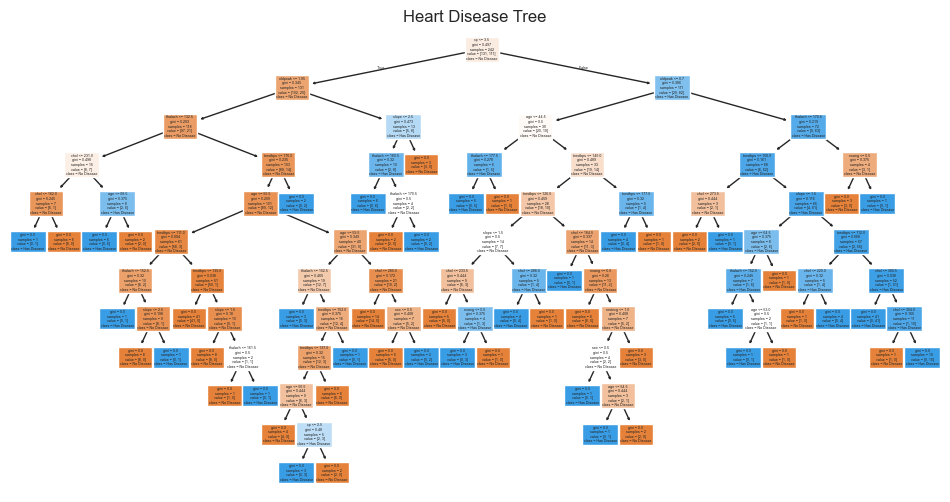

In [253]:
# Plot Decision Tree for Case 1
fig = plt.figure(figsize=(12, 6))
plot_tree(
    tree_model, feature_names=X.columns, class_names=["No Disease", "Has Disease"], filled=True
)
plt.title("Heart Disease Tree")
plt.show()

# Save image
fig.savefig("tree.png")

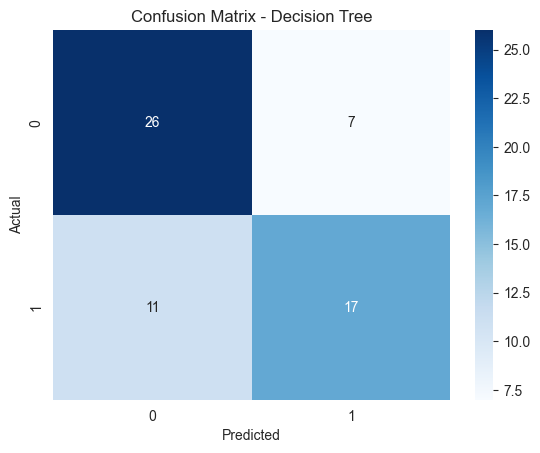

In [254]:
# Create confusion matrix for test predictions 
cm2 = confusion_matrix(y_test, y2_test_pred)

# Plot heatmap
sns.heatmap(cm2, annot=True, cmap="Blues")
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [256]:
# Results of Decision Tree
# Predict on training data
y2_pred = tree_model.predict(X_train)
print("Results for Decision Tree on training data")
print(classification_report(y_train, y2_pred))

# Predict on test data
y2_test_pred = tree_model.predict(X_test)
print("Results for Decision Tree on test data")
print(classification_report(y_test, y2_test_pred))

Results for Decision Tree on training data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00       111

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242

Results for Decision Tree on test data
              precision    recall  f1-score   support

           0       0.69      0.76      0.72        33
           1       0.68      0.61      0.64        28

    accuracy                           0.69        61
   macro avg       0.69      0.68      0.68        61
weighted avg       0.69      0.69      0.69        61



### 5.2 Compare performance of all models across the same performance metrics.

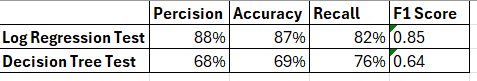


### Reflection 5: 
1. Which model performed better? Why might one classifier be more effective in this specific case? In my project, the log regression performed a lot better than the decision tree.

## Section 6. Final Thoughts & Insights

### 6.1 Summarize findings.
I found that the log regression model worked better than the decision tree model and with a little more adjusting can be a really useful non-invasive way of detecting heart disease early.

### 6.2 Discuss challenges faced.
The biggest challenges were figuring out what combination of model and histograms convey exact answer or goal of the project. 

### 6.3 If you had more time, what would you try next?
I would like to play around with the different model types and different histograms available through seaborn and matplotlib.

### Reflection 6: What did you learn from this project?
I learned that I still have a long way to go to grasp the amount of possibility with these programs. There is so much they can do and I am at the beginning of my education journey into them.